In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Adicionando Canal do DataSet (Channel do MNIST eh 1)
x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test),28,28, 1))


#x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1

x_train.shape



(60000, 28, 28, 1)

In [4]:

#
x_train.shape

#


(60000, 28, 28, 1)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

28

In [7]:
model = Sequential()

#Filters = IMG_width/2 * 7
model.add(Conv2D(98, #alterado de 168 para 98
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
model.add(BatchNormalization())

#Filters = IMG_width/2 * 9
model.add(Conv2D(126, 
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
model.add(BatchNormalization())

 
model.add(Flatten())
#IMG_width^ 2
model.add(Dense(784, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(392, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 98)        2548      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 98)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 98)          392       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 126)         308826    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 126)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 2, 126)         504       
_________________________________________________________________
flatten_1 (Flatten)          (None, 504)               0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.02, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 50s 837us/step - loss: 0.5005 - acc: 0.8417 - val_loss: 0.1172 - val_acc: 0.9635
Epoch 2/200
60000/60000 [==============================] - 51s 844us/step - loss: 0.1661 - acc: 0.9495 - val_loss: 0.0749 - val_acc: 0.9769
Epoch 3/200
60000/60000 [==============================] - 51s 845us/step - loss: 0.1171 - acc: 0.9644 - val_loss: 0.0600 - val_acc: 0.9812
Epoch 4/200
60000/60000 [==============================] - 51s 846us/step - loss: 0.0945 - acc: 0.9714 - val_loss: 0.0500 - val_acc: 0.9836
Epoch 5/200
60000/60000 [==============================] - 51s 855us/step - loss: 0.0781 - acc: 0.9761 - val_loss: 0.0451 - val_acc: 0.9852
Epoch 6/200
60000/60000 [==============================] - 51s 857us/step - loss: 0.0689 - acc: 0.9789 - val_loss: 0.0463 - val_acc: 0.9855
Epoch 7/200
60000/60000 [==============================] - 51s 858us/step - loss: 0.0611 - acc: 0.9813 - val_l

Epoch 59/200
60000/60000 [==============================] - 51s 842us/step - loss: 0.0043 - acc: 0.9989 - val_loss: 0.0335 - val_acc: 0.9912
Epoch 60/200
60000/60000 [==============================] - 50s 840us/step - loss: 0.0039 - acc: 0.9990 - val_loss: 0.0335 - val_acc: 0.9910
Epoch 61/200
60000/60000 [==============================] - 50s 841us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0313 - val_acc: 0.9919
Epoch 62/200
60000/60000 [==============================] - 51s 845us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0330 - val_acc: 0.9914
Epoch 63/200
60000/60000 [==============================] - 50s 842us/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.0340 - val_acc: 0.9914
Epoch 64/200
60000/60000 [==============================] - 50s 838us/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0340 - val_acc: 0.9910
Epoch 65/200
60000/60000 [==============================] - 51s 842us/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0342 - val_acc: 0.9909
Epoch 66/200


Epoch 117/200
60000/60000 [==============================] - 50s 840us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0372 - val_acc: 0.9909
Epoch 118/200
60000/60000 [==============================] - 50s 838us/step - loss: 9.7937e-04 - acc: 0.9998 - val_loss: 0.0381 - val_acc: 0.9916
Epoch 119/200
60000/60000 [==============================] - 50s 839us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0381 - val_acc: 0.9911
Epoch 120/200
60000/60000 [==============================] - 50s 840us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0412 - val_acc: 0.9908
Epoch 121/200
60000/60000 [==============================] - 50s 840us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0369 - val_acc: 0.9914
Epoch 122/200
60000/60000 [==============================] - 50s 840us/step - loss: 9.3729e-04 - acc: 0.9998 - val_loss: 0.0377 - val_acc: 0.9912
Epoch 123/200
60000/60000 [==============================] - 50s 841us/step - loss: 8.9139e-04 - acc: 0.9998 - val_loss: 0.0375 - val_acc: 0

60000/60000 [==============================] - 50s 839us/step - loss: 8.7868e-04 - acc: 0.9998 - val_loss: 0.0406 - val_acc: 0.9912
Epoch 174/200
60000/60000 [==============================] - 51s 842us/step - loss: 5.2306e-04 - acc: 0.9998 - val_loss: 0.0420 - val_acc: 0.9907
Epoch 175/200
60000/60000 [==============================] - 50s 840us/step - loss: 5.9969e-04 - acc: 0.9999 - val_loss: 0.0409 - val_acc: 0.9915
Epoch 176/200
60000/60000 [==============================] - 50s 842us/step - loss: 7.5280e-04 - acc: 0.9998 - val_loss: 0.0395 - val_acc: 0.9913
Epoch 177/200
60000/60000 [==============================] - 51s 842us/step - loss: 7.1043e-04 - acc: 0.9998 - val_loss: 0.0402 - val_acc: 0.9921
Epoch 178/200
60000/60000 [==============================] - 50s 839us/step - loss: 7.1162e-04 - acc: 0.9998 - val_loss: 0.0412 - val_acc: 0.9915
Epoch 179/200
60000/60000 [==============================] - 50s 839us/step - loss: 8.3158e-04 - acc: 0.9998 - val_loss: 0.0411 - val_acc:

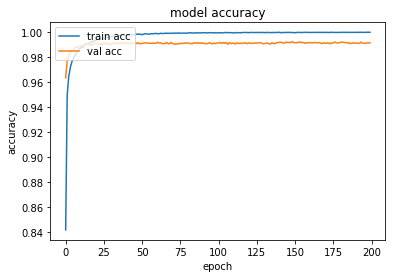

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

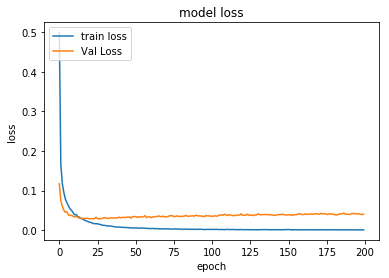

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0406031847161
Test accuracy: 0.9916


In [14]:
print(history.history)

{'val_loss': [0.11718108745701611, 0.074943695899937296, 0.060010077934013681, 0.050005359454476275, 0.04506827187414747, 0.0463303995072376, 0.038010116164415374, 0.037296823621678049, 0.036817678640410301, 0.034949926705108374, 0.033345966904553645, 0.034487828165314566, 0.032630847528926095, 0.030346316376700998, 0.030321645779289245, 0.029424699784265249, 0.029543674418638692, 0.029219987263623626, 0.029773084180470324, 0.029612185056256568, 0.027919985350962816, 0.029115152600764849, 0.028469028880156476, 0.028549832814674301, 0.032394297966967495, 0.02902778570715327, 0.028098241315395536, 0.028901757105691286, 0.029345854897531536, 0.030434168640338613, 0.031796053653777565, 0.029810931027410878, 0.029466360481859372, 0.030270466747505269, 0.030713100254317578, 0.030495893175767379, 0.030874392135290508, 0.0303827919512446, 0.030752865212151936, 0.032586886284856884, 0.030959047010868743, 0.031997669398665676, 0.032171659853374057, 0.031581079510955533, 0.032948927214061313, 0.0